In [1]:
from src.titanic.config import data_dir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### We upload the file as a Pandas DataFrame

In [2]:
df = pd.read_csv(data_dir / 'titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Firstly, we will explore how many missing values there are

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For our purpose, missing data in 'Cabin' variable does not affect us, but 'Age' and 'Embarked' are important. So we delete rows where are missing values

In [4]:
df = df.dropna(subset=['Age', 'Embarked'])
df.reset_index(drop=True, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For future propuses let's transform 'Survived' variable from quantitative to categorial variable:

 1 -> 'Alive' 
 
 0 -> 'Dead'

In [5]:
df["Survived_c"] = df["Survived"].apply(lambda x: "Dead" if x == 0 else "Alive")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_c
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Alive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Alive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead


### Quantitative variables

#### Age

<function matplotlib.pyplot.show(close=None, block=None)>

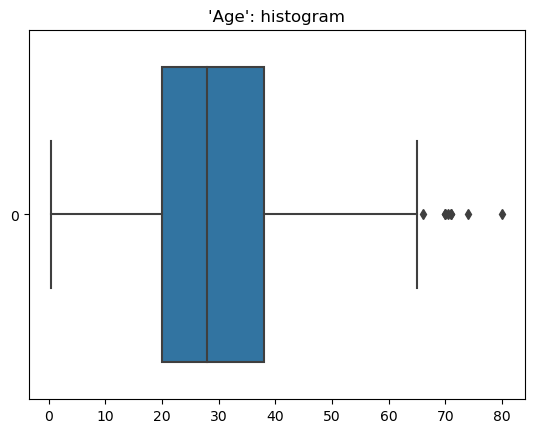

In [6]:
sns.boxplot(data=df['Age'], orient='h')
plt.title("'Age': histogram")
plt.show

In [7]:
print(np.percentile(df['Age'], 25))
print(np.percentile(df['Age'], 50)) 
print(np.percentile(df['Age'], 75))

20.0
28.0
38.0


> The median age is 28. Additionally, the first quartile (Q1) is 20 and the third quartile (Q3) is 38.

#### SibSp: number of siblings or spouses

<function matplotlib.pyplot.show(close=None, block=None)>

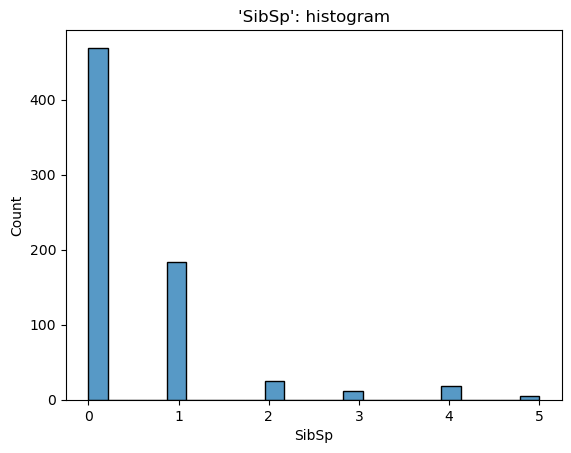

In [8]:
sns.histplot(data=df['SibSp'])
plt.title("'SibSp': histogram")
plt.show

In [9]:
df.groupby('SibSp').size().reset_index(name='Count')

,SibSp,Count
0,0,469
1,1,183
2,2,25
3,3,12
4,4,18
5,5,5


> Most people 469 didn't have siblings or spouses on board

#### Parch: Number of parents or children

<function matplotlib.pyplot.show(close=None, block=None)>

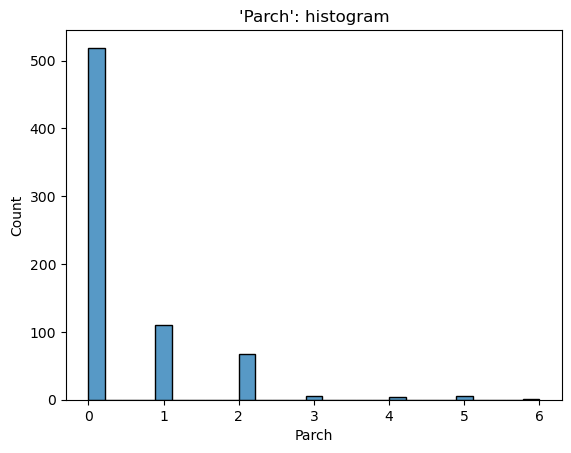

In [10]:
sns.histplot(data=df['Parch'])
plt.title("'Parch': histogram")
plt.show

In [11]:
df.groupby('Parch').size().reset_index(name='Count')

,Parch,Count
0,0,519
1,1,110
2,2,68
3,3,5
4,4,4
5,5,5
6,6,1


> Most people (519) didn't have parents or children on board

### Qualitative variables

#### Survived_rate

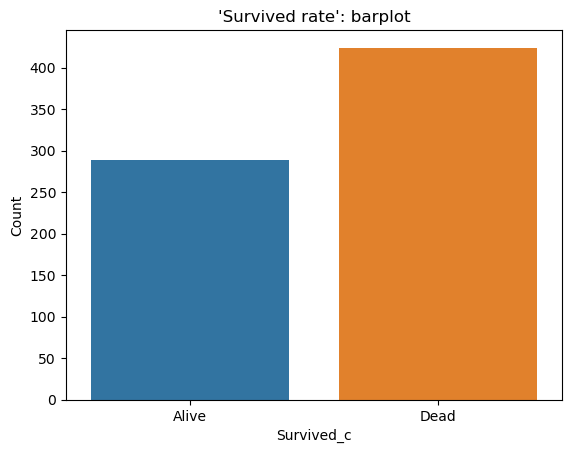

In [12]:
sns.barplot(data = df.groupby('Survived_c').size().reset_index(name='Count'), x='Survived_c', y = 'Count')
plt.title("'Survived rate': barplot")
plt.show()

In [13]:
df.groupby('Survived_c').size().reset_index(name='Count')

,Survived_c,Count
0,Alive,288
1,Dead,424


> Most people tragically died (424)

#### Sex

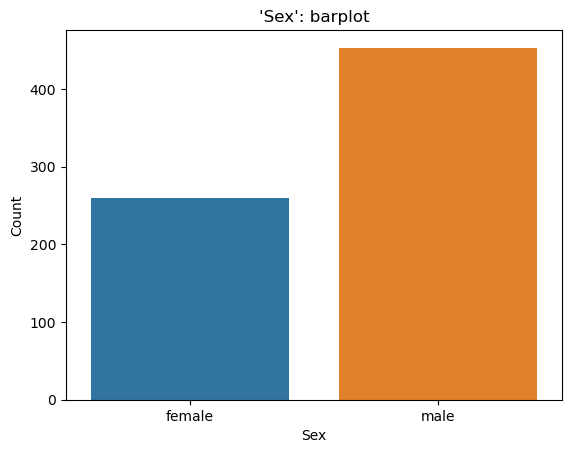

In [14]:
dfsex =  df.groupby('Sex').size().reset_index(name='Count')
sns.barplot(data = dfsex, x='Sex', y = 'Count')
plt.title("'Sex': barplot")
plt.show()

In [15]:
dfsex

,Sex,Count
0,female,259
1,male,453


> Most people on board at The titanic were male (453)

#### Passenger class

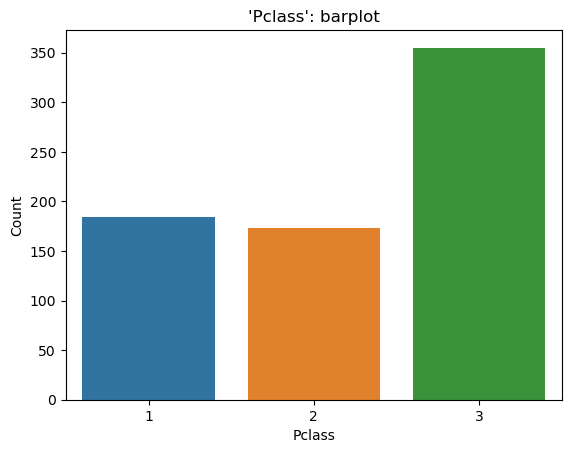

In [16]:
dfpclass = df.groupby('Pclass').size().reset_index(name='Count')
sns.barplot(data = dfpclass , x='Pclass', y = 'Count')
plt.title("'Pclass': barplot")
plt.show()

In [17]:
dfpclass

,Pclass,Count
0,1,184
1,2,173
2,3,355


> The majority of people who traveled on the Titanic, specifically 355 individuals, were in third class.

#### Finally, we save the processed data on /data

In [18]:
df.to_csv(data_dir / 'titanic_processed.csv', index = False)